In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings                        
warnings.filterwarnings("ignore")
import os

In [49]:
# Load the dataset
file_path = r'C:\Users\Maria Sebastina\Desktop\project\Crop Production data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [50]:
# Check for missing values
df.isnull().sum()
print(df.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [51]:
# Drop rows with missing Production values
df.dropna(subset=['Production'], inplace=True)

# Verify that the missing values are handled
print(df.isnull().sum())


State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


In [52]:
# Get basic statistics of the data
print(df.describe())

           Crop_Year          Area    Production
count  242361.000000  2.423610e+05  2.423610e+05
mean     2005.625773  1.216741e+04  5.825034e+05
std         4.958285  5.085744e+04  1.706581e+07
min      1997.000000  1.000000e-01  0.000000e+00
25%      2002.000000  8.700000e+01  8.800000e+01
50%      2006.000000  6.030000e+02  7.290000e+02
75%      2010.000000  4.545000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


In [53]:
# Check the data types of each column
print(df.dtypes)

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object


In [54]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)


In [55]:
# Example: Convert 'Year' to datetime format (if needed)
df['Crop_Year'] = pd.to_datetime(df['Crop_Year'], format='%Y')

# Example: Convert categorical columns to numeric codes
df['Crop'] = df['Crop'].astype('category').cat.codes


In [56]:
# Example: Removing outliers in 'Production' column
df = df[(df['Production'] > df['Production'].quantile(0.01)) & 
         (df['Production'] < df['Production'].quantile(0.99))]


In [57]:
# Example: Creating a new feature 'Production per Area'
df['Production_per_Area'] = df['Production'] / df['Area']


In [58]:
# Check if there are still missing values
print(df.isnull().sum())

# Display the first few rows of the cleaned data
print(df.head())


State_Name             0
District_Name          0
Crop_Year              0
Season                 0
Crop                   0
Area                   0
Production             0
Production_per_Area    0
dtype: int64
                    State_Name District_Name  Crop_Year       Season  Crop  \
0  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Kharif          2   
1  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Kharif         74   
2  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Kharif         95   
3  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Whole Year      7   
4  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Whole Year     22   

     Area  Production  Production_per_Area  
0  1254.0      2000.0             1.594896  
1     2.0         1.0             0.500000  
2   102.0       321.0             3.147059  
3   176.0       641.0             3.642045  
4   720.0       165.0             0.229167  


In [59]:
# Export the cleaned data to a CSV file
cleaned_file_path = r'C:\Users\Maria Sebastina\Desktop\project\Cleaned_Crop_Production_Data.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data exported to {cleaned_file_path}")


Cleaned data exported to C:\Users\Maria Sebastina\Desktop\project\Cleaned_Crop_Production_Data.csv


In [60]:
# Fill missing Production values with the mean (or median)
df['Production'].fillna(df['Production'].mean(), inplace=True)

# Verify that the missing values are handled
print(df.isnull().sum())


State_Name             0
District_Name          0
Crop_Year              0
Season                 0
Crop                   0
Area                   0
Production             0
Production_per_Area    0
dtype: int64


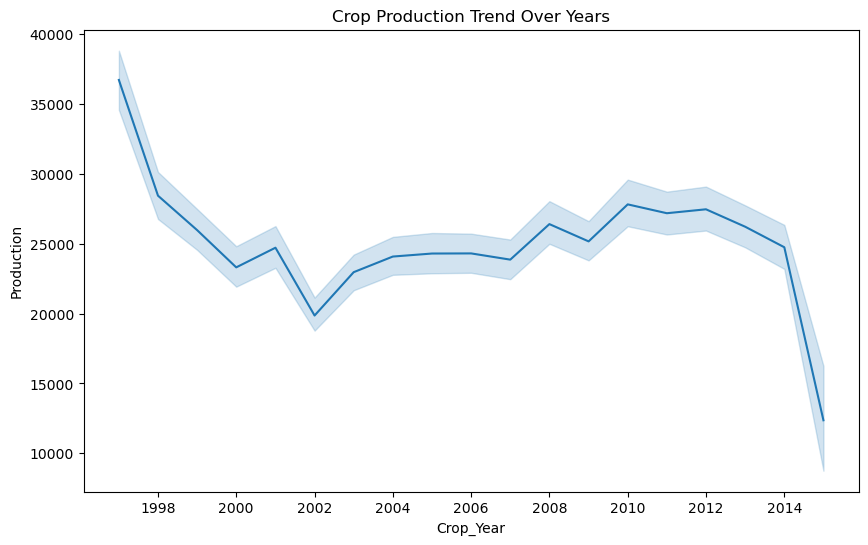

In [61]:
# Crop production trend over the years
plt.figure(figsize=(10,6))
sns.lineplot(x='Crop_Year', y='Production', data=df)
plt.title('Crop Production Trend Over Years')
plt.show()


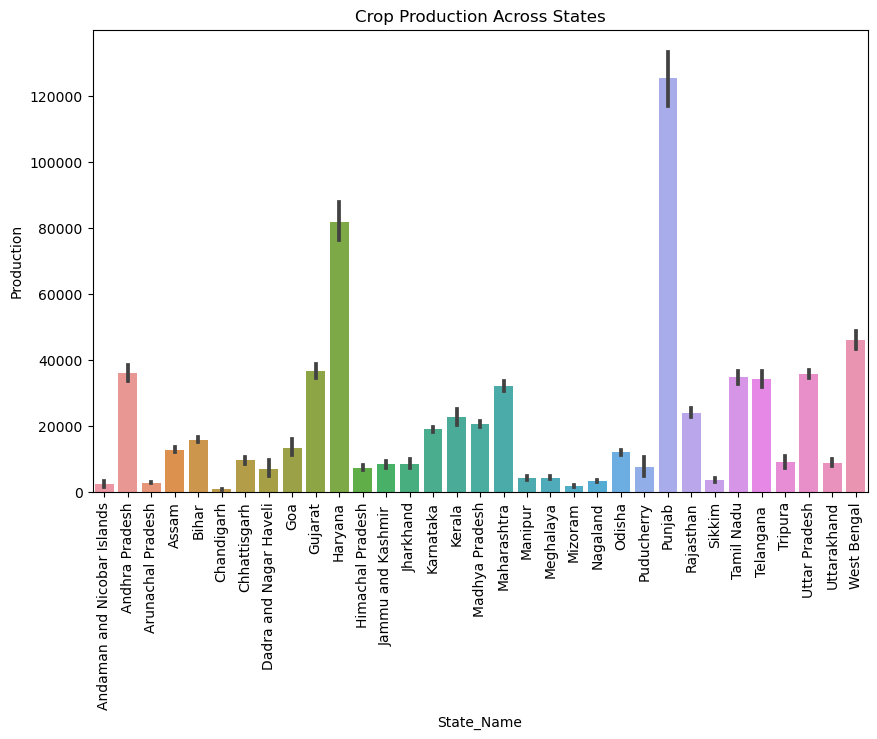

In [62]:
# Crop production distribution across states
plt.figure(figsize=(10,6))
sns.barplot(x='State_Name', y='Production', data=df)
plt.title('Crop Production Across States')
plt.xticks(rotation=90)
plt.show()


In [63]:
# Print column names to verify
print(df.columns)


Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Production_per_Area'],
      dtype='object')


In [64]:
print(df[['Crop_Year', 'Production']].isnull().sum())


Crop_Year     0
Production    0
dtype: int64


In [65]:
# Example: Creating a new feature 'Production per Area'
df['Production_per_Area'] = df['Production'] / df['Area']


In [66]:
# Split the data into features and target variable
X = df.drop('Production', axis=1)
y = df['Production']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df, columns=['State_Name', 'Crop'], drop_first=True)

# Verify the changes
print(df_encoded.head())


  District_Name  Crop_Year       Season    Area  Production  \
0      NICOBARS 2000-01-01  Kharif       1254.0      2000.0   
1      NICOBARS 2000-01-01  Kharif          2.0         1.0   
2      NICOBARS 2000-01-01  Kharif        102.0       321.0   
3      NICOBARS 2000-01-01  Whole Year    176.0       641.0   
4      NICOBARS 2000-01-01  Whole Year    720.0       165.0   

   Production_per_Area  State_Name_Andhra Pradesh  \
0             1.594896                      False   
1             0.500000                      False   
2             3.147059                      False   
3             3.642045                      False   
4             0.229167                      False   

   State_Name_Arunachal Pradesh  State_Name_Assam  State_Name_Bihar  ...  \
0                         False             False             False  ...   
1                         False             False             False  ...   
2                         False             False             False  ...  

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv('Crop Production data.csv')

# Convert Crop_Year to numeric if needed (assuming it's currently datetime)
df['Crop_Year'] = df['Crop_Year'].astype(int)

# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df, columns=['State_Name', 'District_Name', 'Crop'], drop_first=True)

# Handle missing values in the target variable (Production)
# Option 1: Drop rows with missing target values
df_encoded = df_encoded.dropna(subset=['Production'])

# Option 2: Fill missing target values with the mean
# df_encoded['Production'] = df_encoded['Production'].fillna(df_encoded['Production'].mean())

# Prepare features and target variable
X = df_encoded.drop(['Production', 'Crop_Year'], axis=1)  # Drop target and year columns
y = df_encoded['Production']

# Check for any remaining non-numeric columns
print("Remaining non-numeric columns in X:")
print(X.select_dtypes(include=['object']).columns)

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Check for any missing values in features and handle them (e.g., fill with 0 or mean)
X = X.fillna(0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')


Remaining non-numeric columns in X:
Index(['Season'], dtype='object')
R^2 Score: 0.17850921336448844
Mean Squared Error: 330516799663692.0


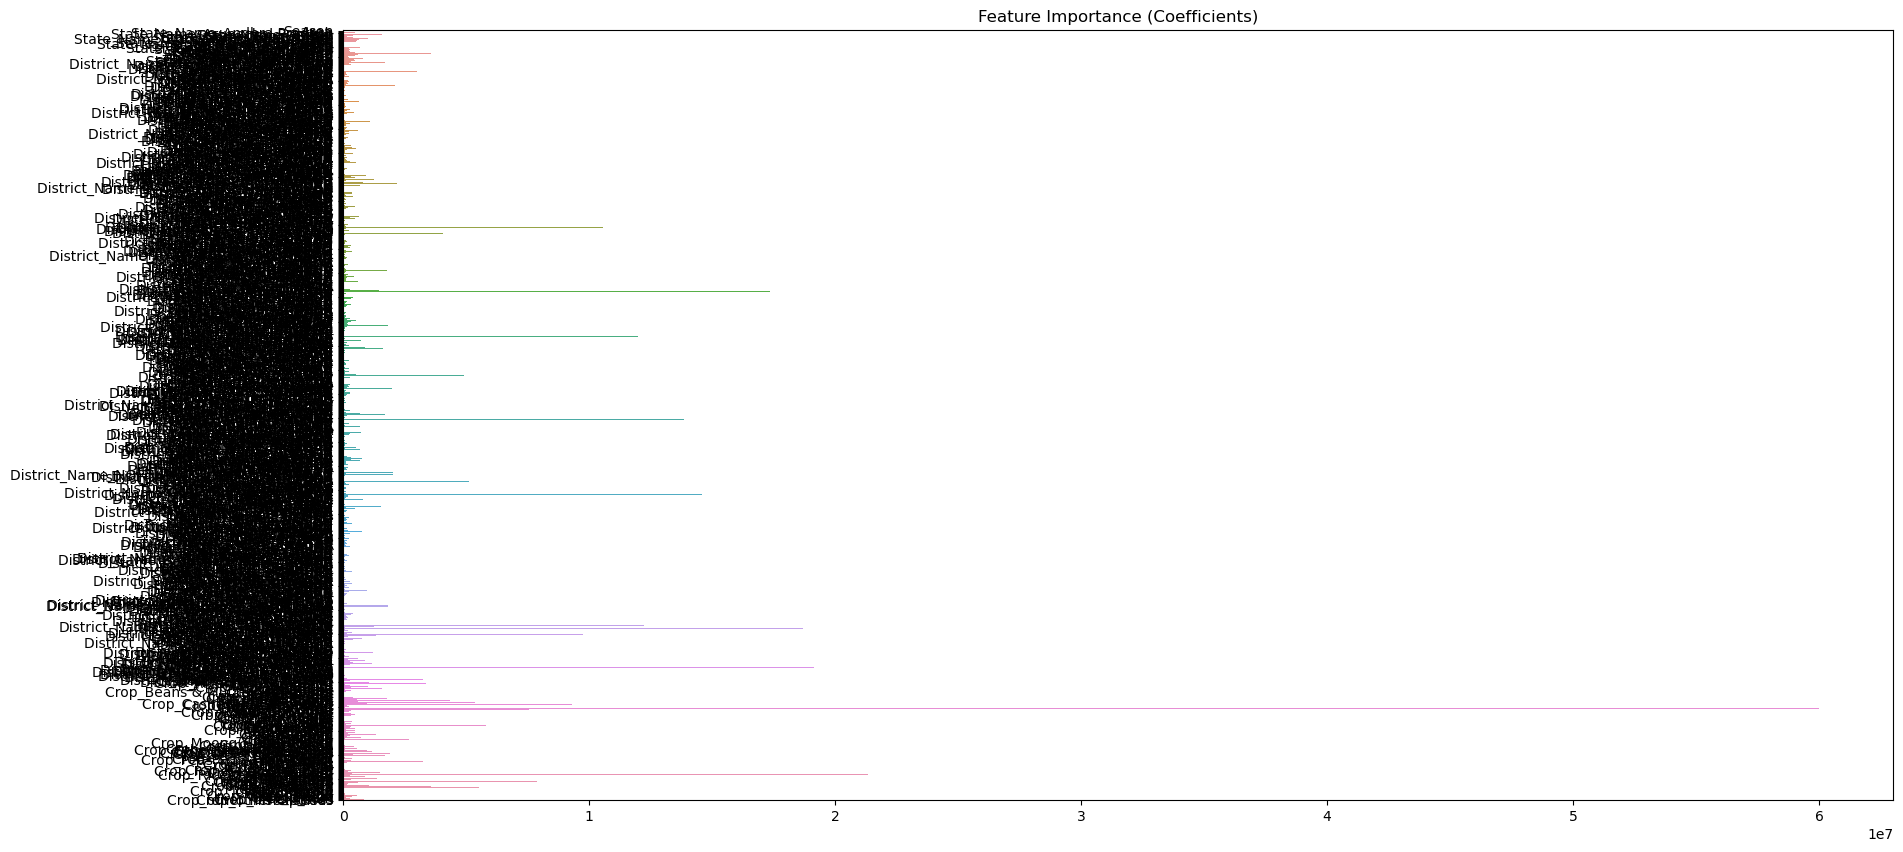

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance based on coefficients
plt.figure(figsize=(20,10))
importance = np.abs(model.coef_)
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance (Coefficients)')
plt.show()


In [70]:
# One-hot encode the 'Season' column
X = pd.get_dummies(X, columns=['Season'], drop_first=True)


In [71]:
# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2_score_value = r2_score(y_test, y_pred)
mse_value = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2_score_value}")
print(f"Mean Squared Error: {mse_value}")


R^2 Score: 0.17850921336464187
Mean Squared Error: 330516799663630.3
